In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\ANANDITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [5]:
# checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
# history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint
checkpoint = ModelCheckpoint(
    filepath='model-{epoch:03d}.keras',  # Use .keras extension
    monitor='val_loss',
    verbose=0,
    save_best_only=True,
    mode='auto'
)

# Train the model
history = model.fit(
    train_data,
    train_target,
    epochs=20,
    callbacks=[checkpoint],
    validation_split=0.2
)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 65s 725ms/step - accuracy: 0.5160 - loss: 0.6934 - val_accuracy: 0.4927 - val_loss: 0.6932
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 508ms/step - accuracy: 0.4697 - loss: 0.6933 - val_accuracy: 0.4927 - val_loss: 0.6933
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 503ms/step - accuracy: 0.4915 - loss: 0.6935 - val_accuracy: 0.4927 - val_loss: 0.6934
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 49s 574ms/step - accuracy: 0.5209 - loss: 0.6927 - val_accuracy: 0.4927 - val_loss: 0.6934
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 504ms/step - accuracy: 0.5042 - loss: 0.6932 - val_accuracy: 0.4927 - val_loss: 0.6934
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 508ms/step - accuracy: 0.5030 - loss: 0.6933 - val_accuracy: 0.4927 - val_loss: 0.6934
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 511ms/step - accuracy: 0.4953 - loss: 0.6935 - val_accuracy: 0.4927 - val_loss: 0.6934
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 508ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accu

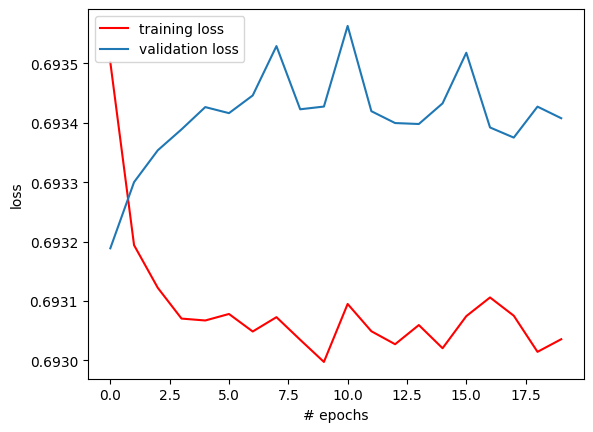

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

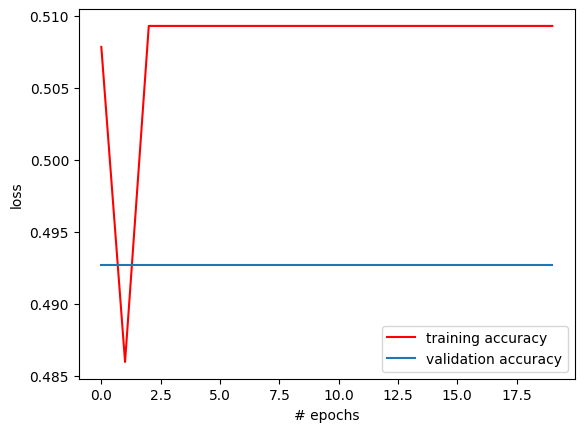

In [7]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
print(model.evaluate(test_data,test_target))

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.4996 - loss: 0.6933
[0.6939849257469177, 0.4803149700164795]
